# Expt 11: THF -0.8V

- 218386: OCV
- 218389: tNR -0.1 to -0.8 V
- 218393: -0.8 V steady state
- 218396: tNR return to OCV
- 218397: Final OCV



In [1]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/TrON'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    import bumps
    from bumps import dream
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

if HAS_BUMPS:
    from tron.bayesian_analysis import fit_uncertainties
    importlib.reload(fit_uncertainties)

#from tron.bayesian_analysis import summary_plots

"M0 z","M0 rho 68 percent lower","M0 rho 68 percent upper","M0 rho 95 percent lower","M0 rho 95 percent upper","M0 rho best","M1 z","M1 rho 68 percent lower","M1 rho 68 percent upper","M1 rho 95 percent lower","M1 rho
 95 percent upper","M1 rho best","M2 z","M2 rho 68 percent lower","M2 rho 68 percent upper","M2 rho 95 percent lower","M2 rho 95 percent upper","M2 rho best"


In [53]:
def plot_sld(ax, idx_offset, data, label, z_offset=0, color=None, show_cl=True, show_best=True):
    z_id = idx_offset
    sld_low_id = idx_offset + 1
    sld_high_id = idx_offset + 2
    sld_best_id = idx_offset + 5

    z = data[z_id]
    best = data[sld_best_id]
    low = data[sld_low_id]
    high = data[sld_high_id]

    _z = z[-1] - z + z_offset
    if show_best:
        ax.plot(
            _z,
            best,
            markersize=4,
            label=label,
            linewidth=1,
            color=color,
        )

    if show_cl:
        _color = plt.gca().lines[-1].get_color() if color is None else color
        ax.fill_between(
            _z,
            low,
            high,
            alpha=0.2,
            color=_color,
        )


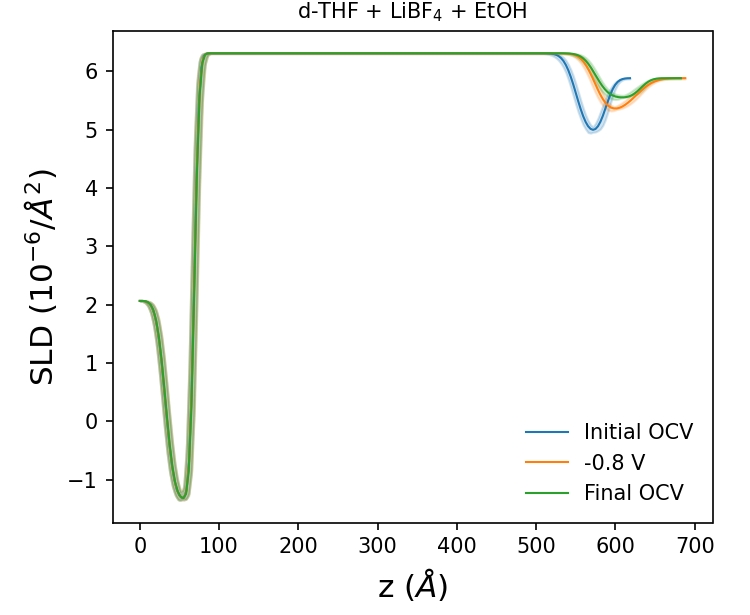

In [39]:
results_dir = os.path.expanduser("~/git/experiments-2025/jen-apr2025/results/")

data = np.genfromtxt(os.path.join(results_dir, "expt11-contours.csv"), delimiter=",").T

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

plot_sld(ax, 0, data, "Initial OCV", z_offset=0)
plot_sld(ax, 6, data, "-0.8 V", z_offset=0)
plot_sld(ax, 12, data, "Final OCV", z_offset=0)

plt.xlabel("z ($\AA$)", fontsize=15)
plt.ylabel("SLD ($10^{-6}/{\AA}^2$)", fontsize=15)
plt.title("d-THF + LiBF$_4$ + EtOH", fontsize=10)
plt.legend(frameon=False)
plt.savefig("expt11-all-corefine.svg")


(132, 201)


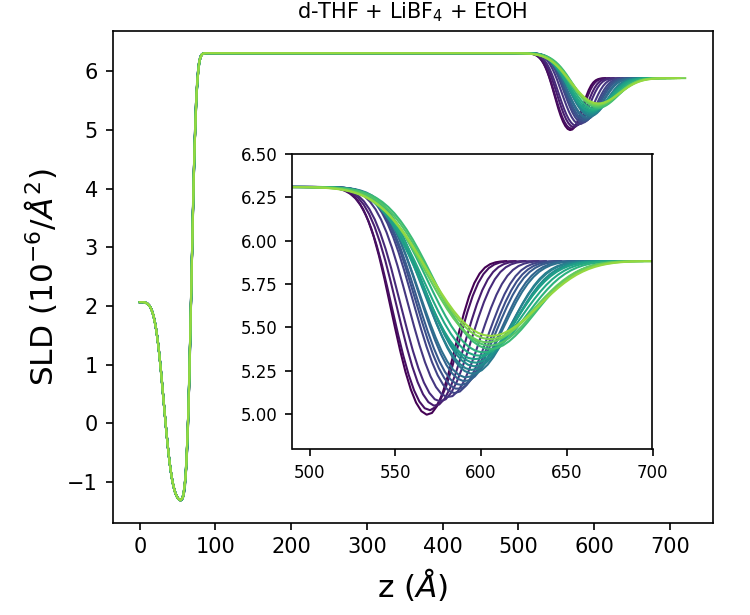

In [49]:
from matplotlib import cm

results_dir = os.path.expanduser("~/git/experiments-2025/jen-apr2025/results/")

data = np.genfromtxt(os.path.join(results_dir, "expt11-tNR-contours.csv"), delimiter=",").T

print(data.shape)

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

# For the full colorscale, color_cutoff = 6
color_cutoff = 5
colors = cm.viridis(np.linspace(0, 1, data.shape[0] // color_cutoff))

for i in range(data.shape[0] // 6):
    plot_sld(ax, i * 6, data, f"tNR {i+1}", z_offset=0, color=colors[i], show_cl=False)

# Inset
ax_inset = ax.inset_axes([0.3, 0.15, 0.6, 0.6])

# Plot the same data in the inset
for i in range(data.shape[0] // 6):
    plot_sld(ax_inset, i * 6, data, f"tNR {i+1}", z_offset=0, color=colors[i], show_best=True, show_cl=False)

# Set the zoomed-in range
ax_inset.set_xlim(490, 700)  # Adjust as needed
ax_inset.set_ylim(4.8, 6.5)   # Adjust as needed

# Add labels to the inset
#ax_inset.set_xlabel("z ($\AA$)", fontsize=10)
#ax_inset.set_ylabel("SLD", fontsize=10)
ax_inset.tick_params(axis='both', which='major', labelsize=8)


plt.xlabel("z ($\AA$)", fontsize=15)
plt.ylabel("SLD ($10^{-6}/{\AA}^2$)", fontsize=15)
plt.title("d-THF + LiBF$_4$ + EtOH", fontsize=10)
#plt.legend(frameon=False)
plt.savefig("expt11-all-tNR-corefine.svg")

(132, 201)


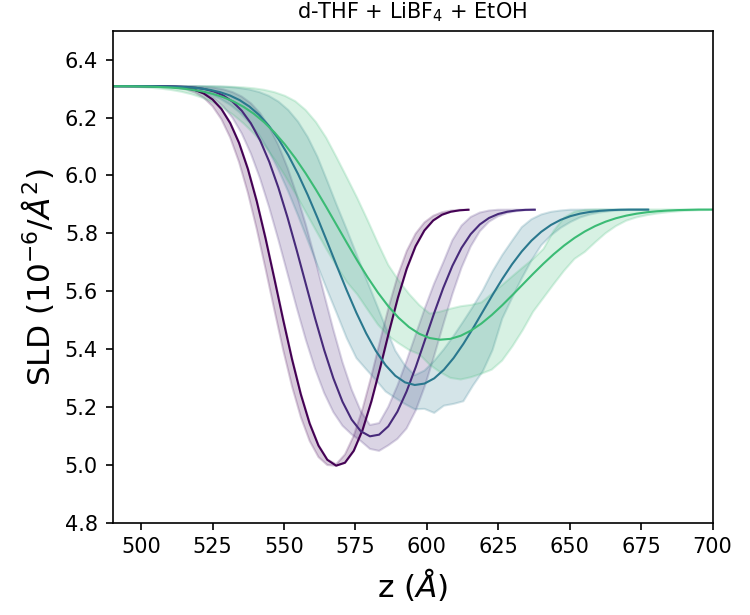

In [84]:
from matplotlib import cm

results_dir = os.path.expanduser("~/git/experiments-2025/jen-apr2025/results/")

data = np.genfromtxt(os.path.join(results_dir, "expt11-tNR-contours.csv"), delimiter=",").T

print(data.shape)

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

# For the full colorscale, color_cutoff = 6
color_cutoff = 5
colors = cm.viridis(np.linspace(0, 1, data.shape[0] // color_cutoff))


# Plot the same data in the inset
for i in [0, 25, 75, 125]: #range(data.shape[0] // 6):
    idx = i // 6
    _color = i // 7
    plot_sld(ax, idx * 6, data, f"tNR {i+1}", z_offset=0, color=colors[_color], show_best=True, show_cl=True)

# Set the zoomed-in range
ax.set_xlim(490, 700)  # Adjust as needed
ax.set_ylim(4.8, 6.5)   # Adjust as needed

if False:
    steady_results_dir = os.path.expanduser("~/git/experiments-2025/jen-apr2025/results/expt11-all-corefine")

    data = np.loadtxt(os.path.join(steady_results_dir, "Cu-THF-corefine-expt11-1-profile.dat")).T
    plt.plot(data[0][-1]-data[0], data[1], '--', color='grey')

    data = np.loadtxt(os.path.join(steady_results_dir, "Cu-THF-corefine-expt11-2-profile.dat")).T
    plt.plot(data[0][-1]-data[0], data[1], '--', color='grey')


plt.xlabel("z ($\AA$)", fontsize=15)
plt.ylabel("SLD ($10^{-6}/{\AA}^2$)", fontsize=15)
plt.title("d-THF + LiBF$_4$ + EtOH", fontsize=10)
#plt.legend(frameon=False)
plt.savefig("expt11-all-tNR-corefine.svg")